In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import transformers


2023-04-26 09:40:08.737660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

label_dict = {'agreed': 0, 'disagreed': 1, 'unrelated': 2}
train_df['label_num'] = train_df['label'].apply(lambda x: label_dict[x])


print(train_df.isnull().sum())
print(train_df.shape)
train_df

id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
label_num    0
dtype: int64
(256442, 7)


,id,tid1,tid2,title1_en,title2_en,label,label_num
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated,2
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated,2
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated,2
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated,2
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated,2
...,...,...,...,...,...,...,...
256437,113364,167562,48447,egypt 's presidential election failed to win m...,Salah is retiring? Football Association offici...,unrelated,2
256438,49407,167562,49795,egypt 's presidential election failed to win m...,Liverpool's bid for Little Germany? The Echo's...,unrelated,2
256439,130134,167562,114783,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated,2
256440,101494,167562,137705,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated,2


In [6]:
print("Train Target Distribution")
print(train_df['label'].value_counts())

from numpy.random import binomial
np.random.seed(0)


grouper = train_df.groupby("label_num")
sizes = grouper.size()

fracs = (sizes.min()) / sizes

train  = pd.DataFrame()

for grp, data in grouper: # reuse the grouper!
    mask = binomial(1, fracs.loc[grp], data.shape[0]).astype(bool)
    train = train.append(data[mask]) # type: ignore

train_df = train.sample(frac=1)
train_df

Train Target Distribution
unrelated    175598
agreed        74238
disagreed      6606
Name: label, dtype: int64


/var/folders/g6/ffg782y56_s5b_cvljcm9_sc0000gn/T/ipykernel_97877/290073229.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data[mask]) # type: ignore
/var/folders/g6/ffg782y56_s5b_cvljcm9_sc0000gn/T/ipykernel_97877/290073229.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data[mask]) # type: ignore
/var/folders/g6/ffg782y56_s5b_cvljcm9_sc0000gn/T/ipykernel_97877/290073229.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data[mask]) # type: ignore


,id,tid1,tid2,title1_en,title2_en,label,label_num
180007,44623,119733,119734,A family of seven killed in a dispute over bri...,"See also ""bride price dispute to a family of s...",disagreed,1
4073,229756,2528,9221,New rule 2018: Drinking without driving is als...,Laying down rumors and taking a rest in the ca...,unrelated,2
81998,254434,55528,5344,how do you get the safest way to cash out the ...,2018 new jingdong white stripe encashment seco...,agreed,0
216120,95527,142459,141764,"Cars add water, a new energy source that can c...",Hydropower cars and beverages can be used as f...,agreed,0
42592,17445,29202,29220,"""Printed"", Xu Zheng will no longer invite Baer...","Baer has been ""crying"" at the scene of Xu Zhen...",unrelated,2
...,...,...,...,...,...,...,...
31794,238635,21741,2532,You can't touch a car for a few hours after dr...,"From now on, as long as you drink and do these...",agreed,0
246395,38124,161009,33835,rumor is that chengguan bridge in chongqing is...,"Rumors of ""Use of Medical Waste in a Rice Flou...",unrelated,2
135648,103112,90360,77392,"Wu Chi-lung, Liu Shih-chui was revealed to be ...",Is Liu Chirong Divorced? Why Liu Shih-shih and...,agreed,0
176604,32041,117194,117195,A man in Zhangjiakou kicked the kid with a stick.,A man with a stick beating a child? This is a ...,disagreed,1


In [7]:
max_length = 128  # Maximum length of input sentence to the model.
batch_size = 32

class BertSemanticDataGenerator(tf.keras.utils.Sequence):
    """Generates batches of data.

    Args:
        sentence_pairs: Array of premise and hypothesis input sentences.
        labels: Array of labels.
        batch_size: Integer batch size.
        shuffle: boolean, whether to shuffle the data.
        include_targets: boolean, whether to incude the labels.

    Returns:
        Tuples `([input_ids, attention_mask, `token_type_ids], labels)`
        (or just `[input_ids, attention_mask, `token_type_ids]`
         if `include_targets=False`)
    """

    def __init__(
        self,
        sentence_pairs,
        labels,
        batch_size=batch_size,
        shuffle=True,
        include_targets=True,
    ):
        self.sentence_pairs = sentence_pairs
        self.labels = labels
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.include_targets = include_targets
        # Load our BERT Tokenizer to encode the text.
        # We will use base-base-uncased pretrained model.
        self.tokenizer = transformers.BertTokenizer.from_pretrained(
            "bert-base-uncased", do_lower_case=True
        )
        self.indexes = np.arange(len(self.sentence_pairs))
        self.on_epoch_end()

    def __len__(self):
        # Denotes the number of batches per epoch.
        return len(self.sentence_pairs) // self.batch_size

    def __getitem__(self, idx):
        # Retrieves the batch of index.
        indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
        sentence_pairs = self.sentence_pairs[indexes]

        # With BERT tokenizer's batch_encode_plus batch of both the sentences are
        # encoded together and separated by [SEP] token.
        encoded = self.tokenizer.batch_encode_plus(
            sentence_pairs.tolist(),
            add_special_tokens=True,
            max_length=max_length,
            return_attention_mask=True,
            return_token_type_ids=True,
            pad_to_max_length=True,
            return_tensors="tf",
            truncation=True,
        )

        # Convert batch of encoded features to numpy array.
        input_ids = np.array(encoded["input_ids"], dtype="int32")
        attention_masks = np.array(encoded["attention_mask"], dtype="int32")
        token_type_ids = np.array(encoded["token_type_ids"], dtype="int32")

        # Set to true if data generator is used for training/validation.
        if self.include_targets:
            labels = np.array(self.labels[indexes], dtype="int32")
            return [input_ids, attention_masks, token_type_ids], labels
        else:
            return [input_ids, attention_masks, token_type_ids]

    def on_epoch_end(self):
        # Shuffle indexes after each epoch if shuffle is set to True.
        if self.shuffle:
            np.random.RandomState(42).shuffle(self.indexes)


In [8]:

train_labels = keras.utils.to_categorical(train_df['label_num'].values)
split = int(len(train_df) * 0.3)

train_data = BertSemanticDataGenerator(
    train_df[:split][["title1_en", "title2_en"]].values.astype("str"),
    train_labels[:split],
    batch_size=batch_size,
    shuffle=True,
)
valid_data = BertSemanticDataGenerator(
    train_df[split:][["title1_en", "title2_en"]].values.astype("str"),
    train_labels[split:],
    batch_size=batch_size,
    shuffle=True,
)



In [10]:
# Create the model under a distribution strategy scope.
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Encoded token ids from BERT tokenizer.
    input_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="input_ids"
    )
    # Attention masks indicates to the model which tokens should be attended to.
    attention_masks = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="attention_masks"
    )
    # Token type ids are binary masks identifying different sequences in the model.
    token_type_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="token_type_ids"
    )
    # Loading pretrained BERT model.
    bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")
    # Freeze the BERT model to reuse the pretrained features without modifying them.
    bert_model.trainable = False

    bert_output = bert_model.bert(
        input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
    )
    sequence_output = bert_output.last_hidden_state
    pooled_output = bert_output.pooler_output
    # Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
    bi_lstm = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)
    )(sequence_output)
    # Applying hybrid pooling approach to bi_lstm sequence output.
    avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
    max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
    concat = tf.keras.layers.concatenate([avg_pool, max_pool])
    dropout = tf.keras.layers.Dropout(0.3)(concat)
    output = tf.keras.layers.Dense(3, activation="softmax")(dropout)
    model = tf.keras.models.Model(
        inputs=[input_ids, attention_masks, token_type_ids], outputs=output
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

model.summary()


Metal device set to: AMD Radeon Pro 5300M

systemMemory: 16.00 GB
maxCacheSize: 1.99 GB

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


2023-04-26 09:41:40.207829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 09:41:40.211797: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-26 09:41:40.212880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 09:41:40.213216: I tensorflow/core/common_runtime/pluggable_device/plug

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)

In [7]:
# pre-train
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10,
    use_multiprocessing=True,
    workers=-1,
)

/Users/Ayler/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/10


2023-04-25 16:53:25.839636: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_10235"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\020FlatMapDataset:1"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        di

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


2023-04-25 16:53:40.162223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 16:53:48.518831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 16:53:48.558042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 16:53:50.049693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 16:53:50.107505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 56/186 [========>.....................] - ETA: 2:14 - loss: 0.9135 - accuracy: 0.5547

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 79/186 [===========>..................] - ETA: 1:48 - loss: 0.8771 - accuracy: 0.5847

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


149/186 [=======================>......] - ETA: 36s - loss: 0.8268 - accuracy: 0.6147

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.8049 - accuracy: 0.6263

2023-04-25 16:56:57.358349: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_32815"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\021FlatMapDataset:22"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        d

186/186 [==============================] - 593s 3s/step - loss: 0.8049 - accuracy: 0.6263 - val_loss: 0.6324 - val_accuracy: 0.7213
Epoch 2/10


2023-04-25 17:03:19.111994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:03:19.127432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 48/186 [======>.......................] - ETA: 2:42 - loss: 0.6271 - accuracy: 0.7220

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


129/186 [===================>..........] - ETA: 1:07 - loss: 0.6338 - accuracy: 0.7226

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


150/186 [=======================>......] - ETA: 43s - loss: 0.6336 - accuracy: 0.7196

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.6332 - accuracy: 0.7218

2023-04-25 17:07:07.609696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:07:07.622317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:07:07.732274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:07:07.744048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 704s 4s/step - loss: 0.6332 - accuracy: 0.7218 - val_loss: 0.6093 - val_accuracy: 0.7329
Epoch 3/10


2023-04-25 17:15:03.571265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:15:03.580673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


113/186 [=================>............] - ETA: 1:18 - loss: 0.5898 - accuracy: 0.7472

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


125/186 [===================>..........] - ETA: 1:06 - loss: 0.5887 - accuracy: 0.7455

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


135/186 [====================>.........] - ETA: 55s - loss: 0.5881 - accuracy: 0.7463

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.5859 - accuracy: 0.7490

2023-04-25 17:18:44.420399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:18:44.434234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:18:44.583302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:18:44.597989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 765s 4s/step - loss: 0.5859 - accuracy: 0.7490 - val_loss: 0.5931 - val_accuracy: 0.7429
Epoch 4/10


2023-04-25 17:27:48.385559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:27:48.398488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 56/186 [========>.....................] - ETA: 2:38 - loss: 0.5380 - accuracy: 0.7751

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 62/186 [=========>....................] - ETA: 2:31 - loss: 0.5429 - accuracy: 0.7717

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


140/186 [=====================>........] - ETA: 1:03 - loss: 0.5374 - accuracy: 0.7741

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.5437 - accuracy: 0.7686

2023-04-25 17:32:03.665613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:32:03.676514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:32:03.814061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:32:03.827562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 733s 4s/step - loss: 0.5437 - accuracy: 0.7686 - val_loss: 0.5444 - val_accuracy: 0.7625
Epoch 5/10


2023-04-25 17:40:01.200696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:40:01.212115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 31/186 [====>.........................] - ETA: 3:06 - loss: 0.5076 - accuracy: 0.7712

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 41/186 [=====>........................] - ETA: 2:55 - loss: 0.5033 - accuracy: 0.7774

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


154/186 [=======================>......] - ETA: 40s - loss: 0.5109 - accuracy: 0.7804

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.5133 - accuracy: 0.7823

2023-04-25 17:43:53.912662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:43:53.925138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:43:54.056854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:43:54.069357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 709s 4s/step - loss: 0.5133 - accuracy: 0.7823 - val_loss: 0.5402 - val_accuracy: 0.7634
Epoch 6/10


2023-04-25 17:51:49.988837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:51:50.000550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 11/186 [>.............................] - ETA: 4:03 - loss: 0.4287 - accuracy: 0.8295

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 97/186 [==============>...............] - ETA: 1:53 - loss: 0.4785 - accuracy: 0.7974

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


103/186 [===============>..............] - ETA: 1:45 - loss: 0.4758 - accuracy: 0.7988

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.4825 - accuracy: 0.7937

2023-04-25 17:55:50.535648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:55:50.546642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:55:50.658647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 17:55:50.670716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 735s 4s/step - loss: 0.4825 - accuracy: 0.7937 - val_loss: 0.5676 - val_accuracy: 0.7436
Epoch 7/10


2023-04-25 18:04:04.771805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 18:04:04.782482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  6/186 [..............................] - ETA: 3:25 - loss: 0.4522 - accuracy: 0.7865

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  8/186 [>.............................] - ETA: 3:23 - loss: 0.4222 - accuracy: 0.8086

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 24/186 [==>...........................] - ETA: 3:15 - loss: 0.4338 - accuracy: 0.8060

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.4442 - accuracy: 0.8142

2023-04-25 18:07:50.877008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 18:07:50.887452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 18:07:50.991458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 18:07:51.001469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 693s 4s/step - loss: 0.4442 - accuracy: 0.8142 - val_loss: 0.5423 - val_accuracy: 0.7694
Epoch 8/10


2023-04-25 18:15:37.849154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 18:15:37.861334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  6/186 [..............................] - ETA: 3:54 - loss: 0.4591 - accuracy: 0.7865

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 41/186 [=====>........................] - ETA: 3:03 - loss: 0.4146 - accuracy: 0.8171

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 84/186 [============>.................] - ETA: 2:05 - loss: 0.4202 - accuracy: 0.8222

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.4213 - accuracy: 0.8177

2023-04-25 18:19:18.333407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 18:19:18.344171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 18:19:18.447560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 18:19:18.457711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 4744s 26s/step - loss: 0.4213 - accuracy: 0.8177 - val_loss: 0.5523 - val_accuracy: 0.7618
Epoch 9/10


2023-04-25 19:34:41.644951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 19:34:41.655208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 24/186 [==>...........................] - ETA: 2:34 - loss: 0.3648 - accuracy: 0.8411

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 43/186 [=====>........................] - ETA: 2:15 - loss: 0.3763 - accuracy: 0.8467

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


132/186 [====================>.........] - ETA: 50s - loss: 0.3846 - accuracy: 0.8390

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.8355

2023-04-25 19:37:36.859735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 19:37:36.868995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 19:37:36.949126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 19:37:36.958396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 521s 3s/step - loss: 0.3905 - accuracy: 0.8355 - val_loss: 0.5396 - val_accuracy: 0.7694
Epoch 10/10


2023-04-25 19:43:22.385096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 19:43:22.394644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  3/186 [..............................] - ETA: 2:45 - loss: 0.3750 - accuracy: 0.8542

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 59/186 [========>.....................] - ETA: 1:54 - loss: 0.3143 - accuracy: 0.8835

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


117/186 [=================>............] - ETA: 1:02 - loss: 0.3397 - accuracy: 0.8627

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.3584 - accuracy: 0.8548

2023-04-25 19:46:11.419329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 19:46:11.427862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 19:46:11.504386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-25 19:46:11.513074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the re

186/186 [==============================] - 513s 3s/step - loss: 0.3584 - accuracy: 0.8548 - val_loss: 0.5537 - val_accuracy: 0.7611


In [19]:
import time
current_time = time.strftime("%m%d_%H%M", time.localtime())
model_name = f'./data/bert_model_{current_time}.h5'
model.save(model_name)

In [11]:
# Fine-tune model

model = tf.keras.models.load_model('./data/bert_model_77.h5')

# Unfreezez the bert_model.
bert_model = model.get_layer('bert')
bert_model.trainable = True

# Recompile the model to make the change effective.
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [14]:
# model.summary()

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=4,
    use_multiprocessing=True,
    workers=-1,
)

/Users/Ayler/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/4
133/186 [====================>.........] - ETA: 2:21 - loss: 0.1694 - accuracy: 0.9460

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


153/186 [=======================>......] - ETA: 1:28 - loss: 0.1676 - accuracy: 0.9457

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


180/186 [============================>.] - ETA: 16s - loss: 0.1696 - accuracy: 0.9439

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.1685 - accuracy: 0.9446

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

186/186 [==============================] - 877s 5s/step - loss: 0.1685 - accuracy: 0.9446 - val_loss: 0.5841 - val_accuracy: 0.7738
Epoch 2/4
 13/186 [=>............................] - ETA: 8:23 - loss: 0.1239 - accuracy: 0.9639

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 38/186 [=====>........................] - ETA: 7:02 - loss: 0.1304 - accuracy: 0.9589

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 92/186 [=============>................] - ETA: 4:26 - loss: 0.1422 - accuracy: 0.9538

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9474

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

186/186 [==============================] - 899s 5s/step - loss: 0.1575 - accuracy: 0.9474 - val_loss: 0.6352 - val_accuracy: 0.7535
Epoch 3/4
 17/186 [=>............................] - ETA: 8:02 - loss: 0.1310 - accuracy: 0.9614

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


101/186 [===============>..............] - ETA: 4:03 - loss: 0.1228 - accuracy: 0.9616

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


139/186 [=====================>........] - ETA: 2:15 - loss: 0.1189 - accuracy: 0.9647

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9588

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

186/186 [==============================] - 954s 5s/step - loss: 0.1327 - accuracy: 0.9588 - val_loss: 0.6251 - val_accuracy: 0.7676
Epoch 4/4
  4/186 [..............................] - ETA: 8:32 - loss: 0.1125 - accuracy: 0.9688

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 59/186 [========>.....................] - ETA: 6:10 - loss: 0.0949 - accuracy: 0.9714

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


117/186 [=================>............] - ETA: 3:22 - loss: 0.0973 - accuracy: 0.9698

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


186/186 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9671

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

186/186 [==============================] - 964s 5s/step - loss: 0.1018 - accuracy: 0.9671 - val_loss: 0.6235 - val_accuracy: 0.7848


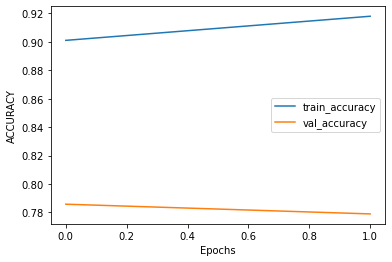

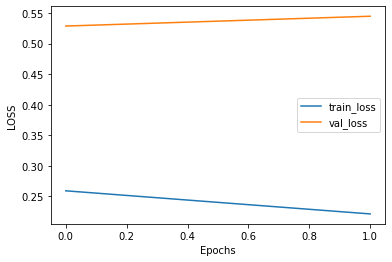

In [13]:
import plot
plot.plot_history(history, 'accuracy', 'val_accuracy')
plot.plot_history(history, 'loss', 'val_loss')

In [ ]:
labels = ['agreed','disagreed','unrelated']

def check_similarity(sentence1, sentence2):
    sentence_pairs = np.array([[str(sentence1), str(sentence2)]])
    test_data = BertSemanticDataGenerator(
        sentence_pairs, labels=None, batch_size=1, shuffle=False, include_targets=False,
    )

    proba = model.predict(test_data[0])[0]
    idx = np.argmax(proba)
    proba = f"{proba[idx]: .2f}"
    pred = labels[idx]
    return pred, proba
    # return model.predict(test_data[0])

In [ ]:

sentence1 = "How to discriminate oil from gutter oil by means of garlic."
sentence2 = "Differential gutter oil can be identified with a single piece of garlic."
check_similarity(sentence1, sentence2)